<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/JingQian_LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

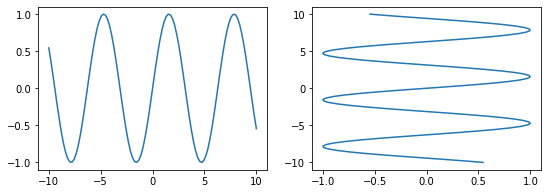

In [17]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)
y = np.sin(x)

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(1,2,1)
ax1 = plt.plot(x,y)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.plot(y,x)


## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because a function has only one output value for each input value. If it intersect the vertical line x=x0, there are more than y1, y2, ... for the input x0.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Based on the vertical line rule, we can discard the following non-function relations:
Relation1,
Relation3,
Relation4,
Relation5.

Only Relation2 can be considered a function.


# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

For function m, the dimensionality of the domain and codomain are both 3.\
For function n, the input dimensionality is 4, output dimensionality is 2.  

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

I don't think it is possible to create a function that maps from a lower dimensional space to a higher dimensional space. To do so, we need expand the basis. Function only transforms inputs but cannot create ones.\
For example, there is no function that can transform unit vector i to unit vector j. 

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

transformation matrix:
\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix}1, 3 \\2, -1 \\  \end{bmatrix}*\begin{bmatrix} x_1\\x_2 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4, 1, 2 \\ 2, -1, 3,\\ 5, -2, 1 \\ \end{bmatrix}*\begin{bmatrix} x_1 \\ x_2 \\ x_3  \\ \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [18]:
import numpy as np
transform_matrix = np.array([[4,1,2], [2, -1, 3], [5, -2, 1]])
v1 = np.array([1, 1, 1])
np.matmul(transform_matrix, v1)
# It is the same as hand calculation

array([7, 4, 4])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are those special vectors in the vector space that don't change their direction during a transformation. The eigenvectors may only change in magnitude during the transformation. An eigenvector's new magnitude after the transformation is their original magnitude factored by a number which we call its eigenvalue.  

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The challenge for me and the majority of my fellow homo sapiens would be to visualize >3 dimensional space on pen and paper, or by computerin or in our brain. 

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

To avoid underfitting, the rule of thumb is N > 5*P, where N = the number of observation, and  P = the number of features in the model. 

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [19]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',99)

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [20]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL                 object
AGE1                     int64
METRO3                  object
REGION                  object
LMED                     int64
FMR                      int64
L30                      int64
L50                      int64
L80                      int64
IPOV                     int64
BEDRMS                   int64
BUILT                    int64
STATUS                  object
TYPE                     int64
VALUE                    int64
VACANCY                  int64
TENURE                  object
NUNITS                   int64
ROOMS                    int64
WEIGHT                 float64
PER                      int64
ZINC2                    int64
ZADEQ                   object
ZSMHC                    int64
STRUCTURETYPE            int64
OWNRENT                 object
UTILITY                float64
OTHERCOST              float64
COST06                 float64
COST12                 float64
COST08                 float64
COSTMED                float64
TOTSAL  

In [21]:
# check if there are any summed up null values are not zero
national.isnull().sum().any()

False

In [22]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [23]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL                category
AGE1                      int64
METRO3                 category
REGION                 category
LMED                      int64
FMR                       int64
L30                       int64
L50                       int64
L80                       int64
IPOV                      int64
BEDRMS                    int64
BUILT                     int64
STATUS                 category
TYPE                      int64
VALUE                     int64
VACANCY                   int64
TENURE                 category
NUNITS                    int64
ROOMS                     int64
WEIGHT                  float64
PER                       int64
ZINC2                     int64
ZADEQ                  category
ZSMHC                     int64
STRUCTURETYPE             int64
OWNRENT                category
UTILITY                 float64
OTHERCOST               float64
COST06                  float64
COST12                  float64
COST08                  float64
COSTMED 

In [24]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes
  #All values of categorical data are either in categories or np.nan. Order is\\
  #defined by the order of categories, not lexical order of the values. \\
  #Internally, the data structure consists of a categories array and \\
  #an integer array of codes which point to the real value in the categories array.

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [25]:
# Now we only have numeric columns (ints and floats)
national_processed.dtypes

CONTROL                  int32
AGE1                     int64
METRO3                    int8
REGION                    int8
LMED                     int64
FMR                      int64
L30                      int64
L50                      int64
L80                      int64
IPOV                     int64
BEDRMS                   int64
BUILT                    int64
STATUS                    int8
TYPE                     int64
VALUE                    int64
VACANCY                  int64
TENURE                    int8
NUNITS                   int64
ROOMS                    int64
WEIGHT                 float64
PER                      int64
ZINC2                    int64
ZADEQ                     int8
ZSMHC                    int64
STRUCTURETYPE            int64
OWNRENT                   int8
UTILITY                float64
OTHERCOST              float64
COST06                 float64
COST12                 float64
COST08                 float64
COSTMED                float64
TOTSAL  

In [0]:
# standardize first
data_mean = national_processed.mean(axis=0)
data_std = national_processed.std(axis=0)

In [27]:
normalized_df=(national_processed-data_mean)/data_std

# note that the last column became NaN, because its std is zero, good practive \\
# to drop that null value???
normalized_df = normalized_df.drop('FMTSTATUS', axis=1)
normalized_df.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION
0,-1.732011,1.488063,0.608779,-1.327862,0.454949,-0.528762,-0.444466,-0.445258,-0.553123,-0.681423,-0.603695,1.504185,-0.271746,-0.14229,-0.409724,-0.268138,-0.51823,-0.253699,0.193639,0.989248,-0.345245,-0.582416,-0.001189,-0.538153,-0.626455,-0.858675,-0.108317,1.002396,-0.524568,-0.489427,-0.510998,-0.535749,-0.692996,-0.774297,0.454949,-0.444466,-0.445258,-0.553123,-0.100275,-0.139348,...,-0.286127,0.448210,-0.508176,-0.588111,-0.524711,-1.139188,-0.294198,0.432577,-0.487459,-0.685207,-0.580664,-0.896539,-0.272846,0.472923,-0.526195,-0.452724,-0.001189,-0.706641,1.728551,-0.627165,-0.612259,-0.858675,0.676604,0.649833,0.615726,0.703535,0.071351,-0.518772,-0.588111,-0.685207,-0.452724,-1.091601,-0.956867,-1.028137,-1.139188,-0.896539,-0.779113,-0.709272,0.549469,-0.462103
1,-1.731957,0.088812,2.184253,0.576693,-0.991316,-0.163390,-0.123183,-0.122456,-0.043566,1.140123,1.224830,0.515769,-0.271746,-0.14229,-0.048319,-0.268138,-0.51823,-0.253699,0.193639,0.213176,0.823737,0.827967,-0.001189,-0.584983,-0.626455,-0.858675,0.478097,-0.065552,-0.214098,-0.155727,-0.190288,-0.235408,1.204949,-0.774297,-0.991316,-0.123183,-0.122456,-0.043566,0.108919,-0.207232,...,-0.353330,0.448210,-0.135191,0.796001,-0.102731,0.682581,-0.316519,0.432577,-0.084419,0.716062,-0.203479,0.115985,-0.399196,0.167738,-0.199903,-0.452724,-0.001189,-0.706641,0.467271,-0.627165,1.390029,-0.858675,-0.080937,0.649833,0.615726,-0.052382,0.778344,0.859813,0.796001,0.716062,-0.452724,0.926084,0.024966,-0.077477,0.682581,0.115985,1.171874,-0.709272,-0.544704,-0.462103
2,-1.731903,0.219992,2.184253,0.576693,-0.991316,-0.163390,-0.892056,-0.892942,-0.901599,-0.071563,1.224830,0.705849,-0.271746,-0.14229,0.031993,-0.268138,-0.51823,-0.253699,0.718702,0.263806,0.044415,-0.448649,-0.001189,0.349583,-0.626455,-0.858675,-0.185140,-0.208709,-0.198694,-0.116071,-0.164789,-0.229293,-0.260943,-0.774297,-0.991316,-0.892056,-0.892942,-0.901599,-0.443530,-0.201749,...,-0.075889,0.448210,-0.099582,0.796001,-0.053669,0.682581,-0.035117,0.432577,-0.028753,0.716062,-0.196045,0.115985,-0.129487,0.472923,-0.191507,-0.452724,-0.001189,-0.706641,0.467271,-0.627165,1.390029,-0.858675,0.676604,0.649833,0.615726,0.703535,0.071351,0.859813,0.796001,0.716062,-0.452724,-0.082758,0.024966,0.397853,0.682581,0.115985,0.001282,-0.709272,1.643642,-0.462103
3,-1.731850,0.832164,2.184253,0.576693,-0.991316,-0.546523,-0.892056,-0.892942,-0.901599,-0.280159,0.310567,0.705849,-0.271746,-0.14229,0.232774,-0.268138,-0.51823,-0.253699,0.193639,0.384869,0.044415,-0.391583,-0.001189,-0.796736,-0.626455,-0.858675,-0.031494,0.019197,0.031870,0.106709,0.062990,0.003272,-0.692996,-0.774297,-0.991316,-0.892056,-0.892942,-0.901599,-0.443530,-0.634988,...,0.261295,0.448210,0.425173,0.796001,0.351201,1.138024,0.296508,0.432577,0.486187,0.716062,0.220676,0.622247,0.212107,0.472923,0.336527,0.923662,-0.001189,-0.706641,0.467271,-0.627165,0.388885,-0.858675,0.676604,0.649833,0.615726,0.703535,0.778344,0.859813,0.796001,0.716062,0.923662,-0.082758,1.006799,1.348512,1.138024,0.622247,0.001282,-0.709272,-0.544704,-0.462103
4,-1.73179

In [28]:
y = normalized_df['COST12RELAMICAT'] # select this cost 12 relative to median income percent as dependent variable
Z = normalized_df.drop(['COST12RELAMICAT'], axis=1)
print(Z.shape)
Z.head()

(64535, 97)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELAMICAT,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION
0,-1.732011,1.488063,0.608779,-1.327862,0.454949,-0.528762,-0.444466,-0.445258,-0.553123,-0.681423,-0.603695,1.504185,-0.271746,-0.14229,-0.409724,-0.268138,-0.51823,-0.253699,0.193639,0.989248,-0.345245,-0.582416,-0.001189,-0.538153,-0.626455,-0.858675,-0.108317,1.002396,-0.524568,-0.489427,-0.510998,-0.535749,-0.692996,-0.774297,0.454949,-0.444466,-0.445258,-0.553123,-0.100275,-0.139348,...,-1.028137,-0.286127,0.448210,-0.508176,-0.588111,-0.524711,-0.294198,0.432577,-0.487459,-0.685207,-0.580664,-0.896539,-0.272846,0.472923,-0.526195,-0.452724,-0.001189,-0.706641,1.728551,-0.627165,-0.612259,-0.858675,0.676604,0.649833,0.615726,0.703535,0.071351,-0.518772,-0.588111,-0.685207,-0.452724,-1.091601,-0.956867,-1.028137,-1.139188,-0.896539,-0.779113,-0.709272,0.549469,-0.462103
1,-1.731957,0.088812,2.184253,0.576693,-0.991316,-0.163390,-0.123183,-0.122456,-0.043566,1.140123,1.224830,0.515769,-0.271746,-0.14229,-0.048319,-0.268138,-0.51823,-0.253699,0.193639,0.213176,0.823737,0.827967,-0.001189,-0.584983,-0.626455,-0.858675,0.478097,-0.065552,-0.214098,-0.155727,-0.190288,-0.235408,1.204949,-0.774297,-0.991316,-0.123183,-0.122456,-0.043566,0.108919,-0.207232,...,-0.077477,-0.353330,0.448210,-0.135191,0.796001,-0.102731,-0.316519,0.432577,-0.084419,0.716062,-0.203479,0.115985,-0.399196,0.167738,-0.199903,-0.452724,-0.001189,-0.706641,0.467271,-0.627165,1.390029,-0.858675,-0.080937,0.649833,0.615726,-0.052382,0.778344,0.859813,0.796001,0.716062,-0.452724,0.926084,0.024966,-0.077477,0.682581,0.115985,1.171874,-0.709272,-0.544704,-0.462103
2,-1.731903,0.219992,2.184253,0.576693,-0.991316,-0.163390,-0.892056,-0.892942,-0.901599,-0.071563,1.224830,0.705849,-0.271746,-0.14229,0.031993,-0.268138,-0.51823,-0.253699,0.718702,0.263806,0.044415,-0.448649,-0.001189,0.349583,-0.626455,-0.858675,-0.185140,-0.208709,-0.198694,-0.116071,-0.164789,-0.229293,-0.260943,-0.774297,-0.991316,-0.892056,-0.892942,-0.901599,-0.443530,-0.201749,...,0.397853,-0.075889,0.448210,-0.099582,0.796001,-0.053669,-0.035117,0.432577,-0.028753,0.716062,-0.196045,0.115985,-0.129487,0.472923,-0.191507,-0.452724,-0.001189,-0.706641,0.467271,-0.627165,1.390029,-0.858675,0.676604,0.649833,0.615726,0.703535,0.071351,0.859813,0.796001,0.716062,-0.452724,-0.082758,0.024966,0.397853,0.682581,0.115985,0.001282,-0.709272,1.643642,-0.462103
3,-1.731850,0.832164,2.184253,0.576693,-0.991316,-0.546523,-0.892056,-0.892942,-0.901599,-0.280159,0.310567,0.705849,-0.271746,-0.14229,0.232774,-0.268138,-0.51823,-0.253699,0.193639,0.384869,0.044415,-0.391583,-0.001189,-0.796736,-0.626455,-0.858675,-0.031494,0.019197,0.031870,0.106709,0.062990,0.003272,-0.692996,-0.774297,-0.991316,-0.892056,-0.892942,-0.901599,-0.443530,-0.634988,...,1.348512,0.261295,0.448210,0.425173,0.796001,0.351201,0.296508,0.432577,0.486187,0.716062,0.220676,0.622247,0.212107,0.472923,0.336527,0.923662,-0.001189,-0.706641,0.467271,-0.627165,0.388885,-0.858675,0.676604,0.649833,0.615726,0.703535,0.778344,0.859813,0.796001,0.716062,0.923662,-0.082758,1.006799,1.348512,1.138024,0.622247,0.001282,-0.709272,-0.544704,-0.462103
4,-1.7317

In [29]:
 # calculate the variance-covariance matrix
 ZT = Z.transpose()
 var_cov = ZT.dot(Z) # note pd.mul would do element-wise multiplication
 var_cov

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELAMICAT,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION
CONTROL,64534.000000,694.088074,1437.324945,3630.388151,-3901.808722,-5251.569718,-3894.479485,-3898.071183,-3962.533913,-531.059173,-3329.491764,10811.787690,-763.152351,-988.054938,-2303.140995,-894.127690,5645.658002,4217.665330,-3564.023498,-9370.388994,-58.522479,-2372.532554,243.772324,-2909.101930,4582.021216,6577.529070,-5428.324379,-2388.780742,-3029.162909,-2802.917714,-2941.122858,-3102.600983,-2238.980882,7699.490594,-3901.808722,-3894.479485,-3898.071183,-3962.533913,-1920.592124,-5841.730490,...,-5304.561793,-2995.502080,-2181.964163,-2326.940980,-7341.239220,-2513.932034,-2914.206839,-2290.330616,-2298.122600,-8327.556940,-2699.844081,-4603.480044,-3077.153790,-2016.786620,-2322.010849,-6329.081173,243.772324,1059.084432,12269.302410,4587.820532,-3595.728734,6577.529070,-6486.743819,-6775.424027,-7089.665134,-6309.272789,-5436.437499,-6856.967973,-7341.239220,-8327.556940,-6329.081173,-3952.370070,-4906.034321,-5304.561793,-6129.306395,-4603.480044,-4316.280211,12564.327984,1525.185857,1146.036355
AGE1,694.088074,64534.000000,4962.756744,-2490.614119,1495.403640,4437.101862,-1085.416018,-1078.002440,-1596.440833,12618.191879,4534.094142,-425.270634,-43686.072785,-435.223234,9249.887641,-43105.985823,16161.856010,804.689327,8163.623799,1332.351694,28087.555608,5911.688365,27160.722493,7480.365278,-3875.770226,-18237.992949,8909.630446,7232.982933,4929.351267,6598.528583,5631.589036,4273.945026,-3051.510294,-1991.313892,1495.403640,-1085.416018,-1078.002440,-1596.440833,24606.567940,4383.764941,...,5289.209097,17892.897416,42914.275773,5075.350065,1559.175625,6380.557416,17497.484779,42984.705370,6572.144332,2821.879376,3203.446874,2684.870042,18260.580083,42795.247219,2999.840309,-122.326036,27160.722493,-5979.258156,-1110.740291,-3901.205962,4738.346709,-18237.992949,31222.850843,31628.381301,32169.179645,30787.745164,23086.387249,679.937628,1559.175625,2821.879376,-122.326036,18702.270438,3863.986037,5289.209097,7248.164716,2684.870042,13250.687986,740.783042,20029.520385,-229.451581
METRO3,1437.324945,4962.756744,64534.000000,5284.473635,-24295.360164,-16178.945087,-19687.368353,-19688.716584,-20479.979248,452.848358,9857.507723,8714.912163,-1519.739460,5667.420311,907.131901,-1143.894899,-8901.668561,-10278.744497,8827.651966,15699.881574,1294.755501,-184.548274,-1091.984048,-6080.124414,-6490.137504,-13792.920320,4971.069383,-305.968459,-3199.584164,-1723.961056,-2593.377422,-3747.517962,-1698.316151,-12969.097754,-24295.360164,-19687.368353,-19688.716584,-20479.979248,-10505.243947,-15635.276744,...,3125.146510,-1901.974921,1487.332540,3443.728474,5375.824605,792.573196,-1130.412004,1852.318515,4263.980234,6605.224197,-1462.314537,563.841894,-2912.131086,991.444646,2294.073350,3940.818611,-1091.984048,-44084.233479,8592.787754,-6497.715296,10485.672212,-13792.920320,488.494068,1086.387244,2017.236935,-160.742224,4067.003175,4608.777085,5375.824605,6605.224197,3940.818611,6492.170874,1685.140915,3125.146510,5186.990159,563.841894,6176.093407,-12741.891237,-5599.535849,-3642.600050
REGION,3630.388151,-2490.614119,5284.4736

In [30]:
(var_cov=='-inf').any()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


CONTROL                False
AGE1                   False
METRO3                 False
REGION                 False
LMED                   False
FMR                    False
L30                    False
L50                    False
L80                    False
IPOV                   False
BEDRMS                 False
BUILT                  False
STATUS                 False
TYPE                   False
VALUE                  False
VACANCY                False
TENURE                 False
NUNITS                 False
ROOMS                  False
WEIGHT                 False
PER                    False
ZINC2                  False
ZADEQ                  False
ZSMHC                  False
STRUCTURETYPE          False
OWNRENT                False
UTILITY                False
OTHERCOST              False
COST06                 False
COST12                 False
COST08                 False
COSTMED                False
TOTSAL                 False
ASSISTED               False
GLMED         

In [31]:
# eigendecomposition of covariance matrix
from numpy.linalg import eig
values, vectors = eig(var_cov)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)


 Eigenvectors: 
 [[ 1.77338777e-02+0.j -2.48225525e-03+0.j -8.20778203e-03+0.j ...
   1.20787260e-14+0.j  2.84584121e-14+0.j  2.81881103e-15+0.j]
 [-4.70364023e-02+0.j -1.28554196e-01+0.j -8.98627413e-02+0.j ...
   7.17514964e-14+0.j  8.99649950e-14+0.j  2.98513388e-14+0.j]
 [-1.74168251e-03+0.j  2.70210762e-02+0.j -1.20175696e-01+0.j ...
   1.06849604e-13+0.j  1.00988222e-13+0.j  5.65181062e-14+0.j]
 ...
 [ 8.49903611e-02+0.j -9.57970520e-02+0.j  2.08599834e-02+0.j ...
   2.76169637e-13+0.j  3.26926939e-13+0.j  1.26609233e-13+0.j]
 [-4.01205383e-03+0.j -9.23881819e-02+0.j -1.11539144e-02+0.j ...
  -1.03103410e-13+0.j -1.18018578e-13+0.j -4.95282062e-14+0.j]
 [-1.44415894e-02+0.j -2.42493789e-03+0.j  2.82830849e-02+0.j ...
  -3.40388526e-14+0.j -3.38588764e-14+0.j -1.59523010e-14+0.j]]

 Eigenvalues: 
 [ 2.10739615e+06+0.00000000e+00j  9.09366836e+05+0.00000000e+00j
  6.49241015e+05+0.00000000e+00j  4.52407923e+05+0.00000000e+00j
  3.24634946e+05+0.00000000e+00j  2.53238170e+05+0.0000

In [0]:
# Now use library function
from sklearn.decomposition import PCA
pca = PCA(15)
pca_components = pca.fit_transform(national_processed)

In [33]:
col_names = ['PC'+str(i) for i in range(1, 16)]
pca_df = pd.DataFrame(data = pca_components, columns = col_names)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-111233.044903,-43389.427901,-5278.260017,8520.039267,-32886.666880,3664.729854,-9573.989255,-2546.816001,-1511.076716,52.381496,-527.494545,-823.114744,727.241800,37.157178,142.919430
1,4626.655138,98090.614945,13602.837726,-19328.301923,-31397.307993,-14101.943785,5338.092764,-6188.489418,3302.154231,0.915192,-555.694730,-946.158801,-1432.958829,-637.193309,-3.396421
2,517.600358,-38703.499323,15379.986398,-12699.726458,-33167.796514,-5781.643569,3529.389075,-12566.664884,433.447650,647.243388,111.077082,40.725739,-662.735271,586.043208,72.459744
3,47179.732849,-63444.189120,23942.016689,8296.436069,-32517.708259,-11304.055784,-1101.326631,-6330.139400,435.951103,928.433431,1122.975014,58.384057,125.885468,-439.418660,-51.847482
4,-130392.456457,83246.785424,21452.172386,-15241.435872,-32694.578381,-6736.020642,-7086.099432,-741.811552,388.127781,-13.809703,18.224795,240.799386,-115.420554,-302.395397,40.295599


In [0]:
# concatenate the x PCA matrix with the y
final_df = pd.concat([pca_df, y], axis = 1)

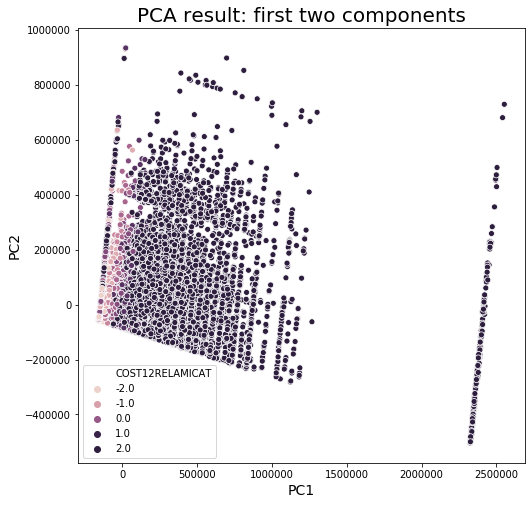

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the PC 1 vs PC 2 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 14)
ax.set_ylabel('Principal Component 2', fontsize = 14)
ax.set_title('PCA result: first two components', fontsize = 20)
ax = sns.scatterplot(x='PC1', y='PC2', hue = 'COST12RELAMICAT', data=final_df)


# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)